### Bagging

In [102]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification

# Cria exemplos - default classes = 2
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)

In [103]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = BaggingClassifier() # 10 estimadores

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Acurácia: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Acurácia: 0.860 (0.044)


### Bagging Hyperparameters

In [105]:
from matplotlib import pyplot

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def executar_teste(models):
    results, names = list(), list() # avaliar resultados e guardar em results

    for name, model in models.items():

        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)

        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()

#### Verificar Número de Árvores

>10 0.855 (0.041)
>50 0.882 (0.038)
>100 0.885 (0.038)
>500 0.887 (0.038)
>1000 0.884 (0.037)
>5000 0.886 (0.036)


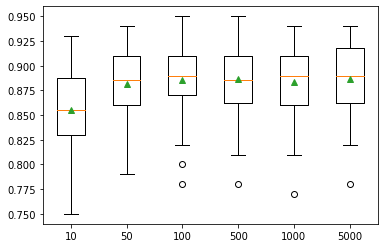

In [106]:
def get_models():
    models = dict()
    # definir numero de árvores
    n_trees = [10, 50, 100, 500, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

executar_teste(get_models())

#### Verificar Número Máximo de Exemplos

>0.1 0.806 (0.032)
>0.2 0.831 (0.045)
>0.3 0.850 (0.034)
>0.4 0.851 (0.040)
>0.5 0.854 (0.036)
>0.6 0.856 (0.032)
>0.7 0.855 (0.038)
>0.8 0.855 (0.040)
>0.9 0.859 (0.037)
>1.0 0.861 (0.041)


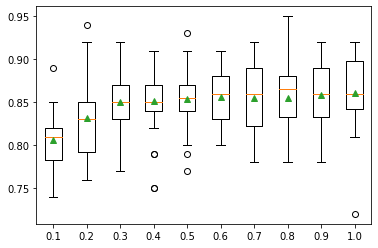

In [109]:
import numpy as np

def get_models():
    models = dict()
    # definir max_samples entre 10% e 100% com passo de 10%
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = BaggingClassifier(max_samples=i)
    return models

executar_teste(get_models())

### Carregar Digits

In [1]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits 
 
digits = load_digits() 

#### Random Forest Classifier

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

nb_classifications = 100
rf_accuracy = []

for i in range(1, nb_classifications):
    a = cross_val_score(RandomForestClassifier(n_estimators=i), digits.data, digits.target,  scoring='accuracy', cv=10).mean()
    rf_accuracy.append(a)

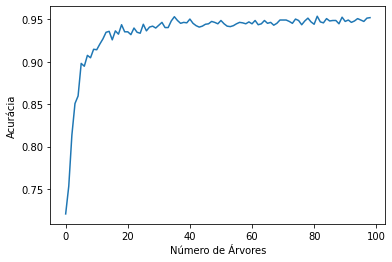

In [3]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(rf_accuracy)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

#### Extra Trees Classifier

In [4]:
from sklearn.ensemble import ExtraTreesClassifier

nb_classifications = 100
et_accuracy = []

for i in range(1, nb_classifications):
    a = cross_val_score(ExtraTreesClassifier(n_estimators=i), digits.data, digits.target,  scoring='accuracy', cv=10).mean()
    et_accuracy.append(a)

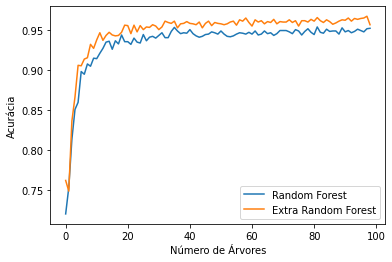

In [5]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(rf_accuracy,label="Random Forest")
plt.plot(et_accuracy,label="Extra Random Forest")

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.legend()

plt.show()

#### Feature Importance

In [6]:
from sklearn.datasets import make_classification
nb_samples = 1000

X, Y = make_classification(n_samples=nb_samples, n_features=20, n_informative=15, n_redundant=5, n_classes=2, n_clusters_per_class=5)


In [7]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X, Y)

RandomForestClassifier(random_state=0)

In [8]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Tempo usado para computar as importâncias: {elapsed_time:.3f} segs")

Tempo usado para computar as importâncias: 0.022 segs


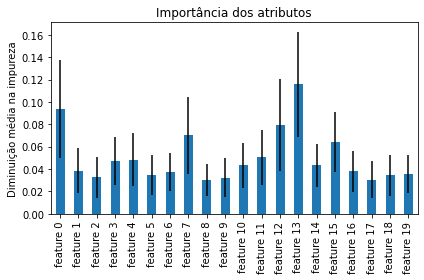

In [9]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importância dos atributos")
ax.set_ylabel("Diminuição média na impureza")  # MDI = Mean decrease in impurity 
fig.tight_layout()

### AdaBoost

In [12]:
from sklearn.ensemble import AdaBoostClassifier

ab_accuracy = []

nb_classifications = 100

for i in range(1, nb_classifications):
    print(i,nb_classifications)
    a = cross_val_score(AdaBoostClassifier(n_estimators=i, learning_rate=0.01), digits.data, digits.target, scoring='accuracy', cv=10).mean()
    ab_accuracy.append(a)

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


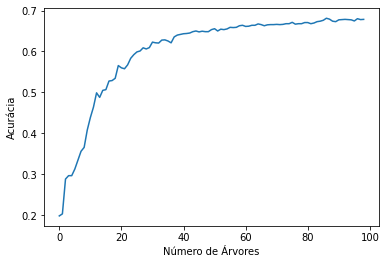

In [13]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(ab_accuracy)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
ab_accuracy2 = []

#ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
#print(cross_val_score(ada, iris.data, iris.target, scoring='accuracy', cv=10).mean())

nb_classifications = 100

for i in range(1, nb_classifications):
    print(i,nb_classifications)
    ada = AdaBoostClassifier(n_estimators=i, learning_rate=1.0)
    a = cross_val_score(ada, iris.data, iris.target, scoring='accuracy', cv=10).mean()
    ab_accuracy2.append(a)

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


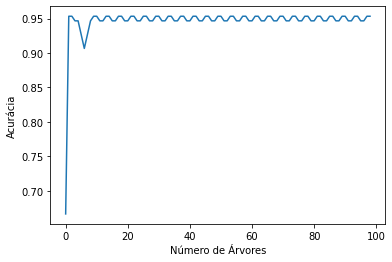

In [17]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(ab_accuracy2)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

### Gradient Tree Boosting

In [18]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=4, n_informative=3, n_redundant=1, n_classes=3)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb_accuracy = []

max_estimators = 100

for i in range(1, max_estimators):
    print(i,nb_classifications)
    score = cross_val_score(GradientBoostingClassifier(n_estimators=i, learning_rate=10.0/float(i)), X, Y, cv=10, scoring='accuracy').mean()
    #score = cross_val_score(GradientBoostingClassifier(n_estimators=i, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean()
    gb_accuracy.append(score)

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


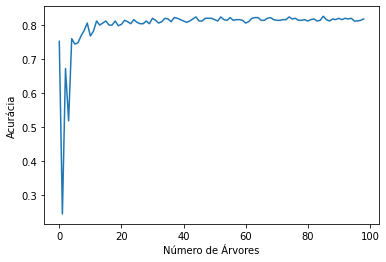

In [21]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(gb_accuracy)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

In [23]:
print(cross_val_score(GradientBoostingClassifier(n_estimators=50, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())

0.772


1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 100
75 100
76 100
77 100
78 100
79 100
80 100
81 100
82 100
83 100
84 100
85 100
86 100
87 100
88 100
89 100
90 100
91 100
92 100
93 100
94 100
95 100
96 100
97 100
98 100
99 100


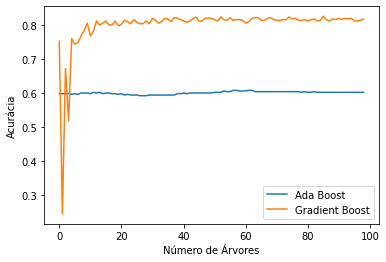

In [22]:
import matplotlib.pyplot as plt
ab_accuracy = []

nb_classifications = 100

for i in range(1, nb_classifications):
    print(i,nb_classifications)
    a = cross_val_score(AdaBoostClassifier(n_estimators=i, learning_rate=0.01),  X, Y, scoring='accuracy', cv=10).mean()
    ab_accuracy.append(a)
    
plt.figure()

plt.plot(ab_accuracy,label="Ada Boost")
plt.plot(gb_accuracy,label="Gradient Boost")

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.legend()

plt.show()

### Outros Algoritmos

In [58]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=4, n_informative=3, n_redundant=1, n_classes=3)

In [60]:
print(cross_val_score(GradientBoostingClassifier(n_estimators=50, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())

0.834


In [64]:
#!pip install lightgbm
from lightgbm import LGBMClassifier

print(cross_val_score(LGBMClassifier(n_estimators=50, learning_rate=0.01, verbose=-1), X, Y, cv=10, scoring='accuracy').mean())

0.842


In [59]:
from sklearn.ensemble import HistGradientBoostingClassifier
print(cross_val_score(HistGradientBoostingClassifier(learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())


0.8700000000000001


In [61]:
#!pip install xgboost
from xgboost import XGBClassifier

print(cross_val_score(XGBClassifier(n_estimators=50, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())

0.8560000000000001


In [75]:
#!pip install catboost
from catboost import CatBoostClassifier
print(cross_val_score(CatBoostClassifier(n_estimators=50, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())

0:	learn: 1.0907370	total: 5.72ms	remaining: 280ms
1:	learn: 1.0833084	total: 10.5ms	remaining: 251ms
2:	learn: 1.0754913	total: 14.6ms	remaining: 229ms
3:	learn: 1.0676055	total: 52.5ms	remaining: 603ms
4:	learn: 1.0601935	total: 57.8ms	remaining: 521ms
5:	learn: 1.0522740	total: 62.8ms	remaining: 460ms
6:	learn: 1.0455415	total: 66.7ms	remaining: 410ms
7:	learn: 1.0382726	total: 70.7ms	remaining: 371ms
8:	learn: 1.0312806	total: 74.8ms	remaining: 341ms
9:	learn: 1.0236723	total: 78.9ms	remaining: 316ms
10:	learn: 1.0163775	total: 83.3ms	remaining: 295ms
11:	learn: 1.0103119	total: 87.2ms	remaining: 276ms
12:	learn: 1.0036291	total: 91.1ms	remaining: 259ms
13:	learn: 0.9975385	total: 95.3ms	remaining: 245ms
14:	learn: 0.9904628	total: 99.2ms	remaining: 231ms
15:	learn: 0.9840459	total: 103ms	remaining: 219ms
16:	learn: 0.9775897	total: 107ms	remaining: 208ms
17:	learn: 0.9717129	total: 111ms	remaining: 198ms
18:	learn: 0.9649870	total: 115ms	remaining: 188ms
19:	learn: 0.9588692	total

0:	learn: 1.0902481	total: 6.47ms	remaining: 317ms
1:	learn: 1.0824626	total: 11.7ms	remaining: 282ms
2:	learn: 1.0747904	total: 15.9ms	remaining: 249ms
3:	learn: 1.0671103	total: 19.9ms	remaining: 228ms
4:	learn: 1.0599491	total: 24.3ms	remaining: 219ms
5:	learn: 1.0514158	total: 29ms	remaining: 212ms
6:	learn: 1.0442554	total: 34.4ms	remaining: 211ms
7:	learn: 1.0370275	total: 38.8ms	remaining: 204ms
8:	learn: 1.0299725	total: 43.3ms	remaining: 197ms
9:	learn: 1.0227081	total: 47.2ms	remaining: 189ms
10:	learn: 1.0160079	total: 51ms	remaining: 181ms
11:	learn: 1.0099876	total: 54.8ms	remaining: 174ms
12:	learn: 1.0026798	total: 58.9ms	remaining: 168ms
13:	learn: 0.9969391	total: 62.7ms	remaining: 161ms
14:	learn: 0.9904579	total: 66.6ms	remaining: 155ms
15:	learn: 0.9844068	total: 70.4ms	remaining: 150ms
16:	learn: 0.9777609	total: 74.5ms	remaining: 145ms
17:	learn: 0.9718463	total: 78.4ms	remaining: 139ms
18:	learn: 0.9656663	total: 82.2ms	remaining: 134ms
19:	learn: 0.9595902	total

10:	learn: 1.0140322	total: 45.6ms	remaining: 162ms
11:	learn: 1.0072884	total: 50ms	remaining: 158ms
12:	learn: 1.0006931	total: 54.2ms	remaining: 154ms
13:	learn: 0.9940671	total: 58.1ms	remaining: 149ms
14:	learn: 0.9867979	total: 62ms	remaining: 145ms
15:	learn: 0.9804592	total: 69.7ms	remaining: 148ms
16:	learn: 0.9743606	total: 74.3ms	remaining: 144ms
17:	learn: 0.9678976	total: 78.2ms	remaining: 139ms
18:	learn: 0.9620869	total: 82.3ms	remaining: 134ms
19:	learn: 0.9557734	total: 86.3ms	remaining: 130ms
20:	learn: 0.9500473	total: 90.9ms	remaining: 126ms
21:	learn: 0.9440478	total: 96ms	remaining: 122ms
22:	learn: 0.9378538	total: 100ms	remaining: 117ms
23:	learn: 0.9324609	total: 106ms	remaining: 114ms
24:	learn: 0.9271918	total: 109ms	remaining: 109ms
25:	learn: 0.9210291	total: 113ms	remaining: 105ms
26:	learn: 0.9150616	total: 118ms	remaining: 100ms
27:	learn: 0.9097735	total: 122ms	remaining: 96ms
28:	learn: 0.9035453	total: 126ms	remaining: 91.3ms
29:	learn: 0.8985746	tota

### Voting classifier

In [24]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, n_classes=2)

In [25]:
X, Y = digits.data, digits.target

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(max_iter = 5000)
svc = SVC(kernel='poly', probability=True, max_iter = 5000)
dt = DecisionTreeClassifier()

classifiers = [('lr', lr),
               ('dt', dt),
               ('svc', svc)]

vc = VotingClassifier(estimators=classifiers, voting='hard')

In [31]:
from sklearn.model_selection import cross_val_score

a = []

a.append(cross_val_score(lr, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia LR:", a[len(a)-1])
a.append(cross_val_score(dt, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia DT:", a[len(a)-1])
a.append(cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia SVR:", a[len(a)-1])
a.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia VC:", a[len(a)-1])

print(np.array(a))

Acurácia LR: 0.92764121663563
Acurácia DT: 0.829143389199255
Acurácia SVR: 0.9777343265052763
Acurácia VC: 0.9532526381129733
[0.92764122 0.82914339 0.97773433 0.95325264]


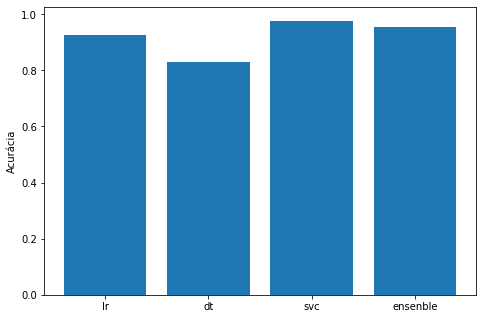

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(['lr','dt','svc','ensenble'],np.array(a))

#ax.set_xlabel("Features")
ax.set_ylabel("Acurácia")

plt.show()


In [33]:
vc = VotingClassifier(estimators=classifiers, voting='soft')
a.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia VC:", a[len(a)-1])

print(np.array(a))

Acurácia VC: 0.9476846679081316
[0.92764122 0.82914339 0.97773433 0.95325264 0.94768467]


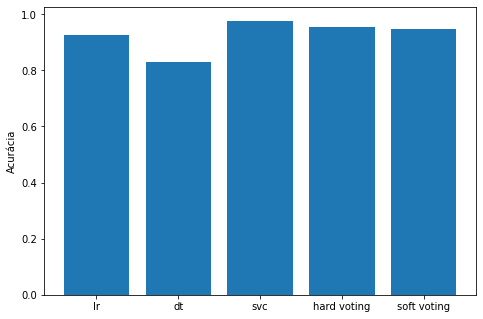

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(['lr','dt','svc','hard voting','soft voting'],np.array(a))

#ax.set_xlabel("Features")
ax.set_ylabel("Acurácia")

plt.show()


In [40]:
weights = [0.75, 0.5, 1.5]

vc = VotingClassifier(estimators=classifiers, weights=weights, voting='soft')
a.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia VC:", a[len(a)-1])

print(np.array(a))

Acurácia VC: 0.9627188081936685
[0.92764122 0.82914339 0.97773433 0.95325264 0.94768467 0.96271881]


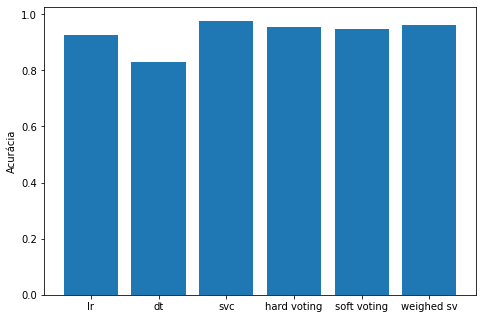

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(['lr','dt','svc','hard voting','soft voting', 'weighed sv'],np.array(a))

#ax.set_xlabel("Features")
ax.set_ylabel("Acurácia")

plt.show()


[0.92764121663563,
 0.829143389199255,
 0.9777343265052763,
 0.9532526381129733,
 0.9476846679081316]

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=i), digits.data, digits.target,  scoring='accuracy', cv=10).mean()


In [55]:
### XGBOOSTING

In [ ]:
### CATBOOSTING

### Usando Ensemble para Regressões

In [94]:
# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)


In [95]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -19.928 (2.034)
R2: 0.953


In [101]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -17.933 (1.914)
R2: 0.963


In [96]:

model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -11.858 (1.125)
R2: 0.985


In [99]:
from lightgbm import LGBMRegressor #!pip install lightgbm

model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -12.739 (1.408)
R2: 0.979


In [97]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -12.723 (1.540)
R2: 0.979


In [98]:
from xgboost import XGBRegressor #!pip install xgboost
from sklearn.model_selection import RepeatedKFold

model = XGBRegressor(objective='reg:squarederror')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -15.048 (1.316)
R2: 0.974


In [100]:
from catboost import CatBoostRegressor #!pip install catboost

model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -9.701 (1.234)
R2: 0.988
